In [1]:
from prevelop import preparation, exploration, clustering, evaluation
from collections import Counter
import matplotlib.pyplot as plt

__Data Preparation and Preprocessing__

In [2]:
### Load the data
# Load the cad-data
cad_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\PrEvelOp_CAD_Export_Römheld.xlsx")
# load process-data
process_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_prozess.xlsx")
# load link data
link_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_teile_zeichnung.xlsx")

C:\Users\IM-KI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
### clear data
# for cad-data received from SIMUS, apply the following cleaning steps
cad_data = preparation.clear_cad_data(cad_data)

In [4]:
### select the data
cad_data, process_data, link_data = preparation.select_data(cad_data, process_data, link_data, 'Zeichnung', 'Teil')

In [5]:
# fill nan values with 0
cad_data = cad_data.fillna(0)

In [6]:
process_data

,Teil,POSITIONS_NR,BELEGUNGSEINHEIT_NR,RUESTZEIT,ZEIT_JE_EINHEIT,VORLAUFZEIT,APL_ARTENSCHLUESSEL
0,3128280,10,66300,5.000,1.00,1.00,11
1,3412946,10,64102,32.000,1.65,0.00,10
2,3412946,20,63205,5.000,1.00,0.34,10
3,3412946,30,63203,1.000,0.01,0.50,21
4,3412946,40,99999,0.001,0.00,0.00,35
...,...,...,...,...,...,...,...
317,520100752,60,63205,5.000,9.20,0.90,10
318,520100752,70,63203,1.000,0.01,1.11,21
319,520100752,80,99999,0.001,0.00,0.00,35
320,520100752,90,96501,35.000,0.01,1.15,30


In [7]:
### aggregate process data
# create a new dataframe to store the aggregated data
process_data_2 = link_data.copy()
teile_list = process_data_2['Teil'].tolist()

nr_arten = []
arten = []
belegungseinheiten = []
ruestzeit = []
vorlaufzeit = []

for teil in teile_list:
    teil_data = process_data[process_data['Teil'] == teil]
    # drop duplicates in teil_data on AkvP
    teil_data.drop_duplicates(subset=['POSITIONS_NR'], inplace=True)
    nr_arten.append(teil_data.shape[0])
    arten.append(teil_data['APL_ARTENSCHLUESSEL'].tolist())
    belegungseinheiten.append(teil_data['BELEGUNGSEINHEIT_NR'].tolist())
    ruestzeit.append(teil_data['ZEIT_JE_EINHEIT'].mean())
    vorlaufzeit.append(teil_data['VORLAUFZEIT'].mean())

# save aggregated data in the new dataframe
process_data_2['Anzahl_Arten'] = nr_arten
process_data_2['Arten'] = arten
process_data_2['Belegungseinheiten'] = belegungseinheiten
process_data_2['Ruestzeit'] = ruestzeit
process_data_2['Vorlaufzeit'] = vorlaufzeit

In [8]:
# select all arten unique
arten = list(set([item for sublist in arten for item in sublist]))
# add a column for each art in arten
# add 1 if the activitiy appears in the process of the respective row, 0 otherwise
for art in arten:
    column_values = [1 if art in process else 0 for process in process_data_2['Arten']]
    process_data_2['Art ' + str(art)] = column_values

# select all belegungseinheiten unique
belegungseinheiten = list(set([item for sublist in belegungseinheiten for item in sublist]))
# add a column for each belegungseinheit in belegungseinheiten
# add 1 if the activitiy appears in the process of the respective row, 0 otherwise
for belegungseinheit in belegungseinheiten:
    column_values = [1 if belegungseinheit in process else 0 for process in process_data_2['Belegungseinheiten']]
    process_data_2['Belegungseinheit ' + str(belegungseinheit)] = column_values

# drop the columns 'Arten' and 'Belegungseinheiten'
process_data_2.drop(columns=['Arten', 'Belegungseinheiten'], inplace=True)

In [9]:
### merge the data
data = preparation.merge_data(cad_data, process_data_2, 'Zeichnung', 'Teil')

In [10]:
data

,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3128280,1,1.000000,1.000000,0,0,1,0,0,0,0,...,RND_008,21122.01,0.166,20539.7,230.0,16.66,16.66,230.0,16.66,12.5
3412946,5,0.534000,0.276000,1,1,0,0,1,1,0,...,RND_011,2445.25,0.019,2202.2,30.0,17.00,17.00,30.0,17.00,6.5
3420613,4,0.006500,0.175000,1,1,0,0,1,1,0,...,RND_008,757.54,0.006,770.2,20.0,20.00,3.80,3.8,20.00,9.0
3468030,9,3.447778,1.857778,1,1,0,1,1,1,0,...,RND_010,244025.92,1.916,44537.8,81.0,80.00,80.00,81.0,80.00,40.0
34701119,4,0.255000,0.270000,1,1,0,0,1,1,0,...,OTHERASSEM,45043.36,0.354,30556.0,60.0,39.00,29.00,0.0,0.00,0.0
34701270,6,1.336667,1.603333,1,1,1,0,1,1,0,...,OTHR_004,149498.38,1.174,75149.1,88.5,79.08,78.40,0.0,0.00,0.0
3470474,8,2.565000,2.717500,1,1,0,0,1,1,0,...,RND_010,23884.52,0.187,10807.6,68.5,36.00,32.00,68.5,36.00,10.0
3470516,11,5.542727,2.804545,1,1,0,0,1,1,1,...,RND_011,349138.09,2.723,63368.3,110.0,85.00,81.00,81.0,151.43,40.0
3502062,8,1.928875,2.255000,1,1,0,0,1,1,0,...,RND_006,39768.89,0.313,11099.7,78.0,40.00,40.00,78.0,40.00,0.0


In [11]:
### preprocess the data
# select numerical, binary and categorical columns for preprocessing
num_colums = ['L [mm]', 'B [mm]', 'H [mm]', 'Ruestzeit', 'Vorlaufzeit', 'Anzahl_Arten', 'Volumen [mm3]', 'Masse [kg]', 'Flächeninhalt [mm2]', 'Da max. [mm]', 'Di min. [mm]']
cat_columns = ['Klasse']
bin_columns = ['Art '+ str(art) for art in arten] + ['Belegungseinheit ' + str(belegungseinheit) for belegungseinheiten in belegungseinheiten]

data_preprocessed = preparation.preprocessing(data, num_colums, bin_columns, cat_columns)

__Exploration__

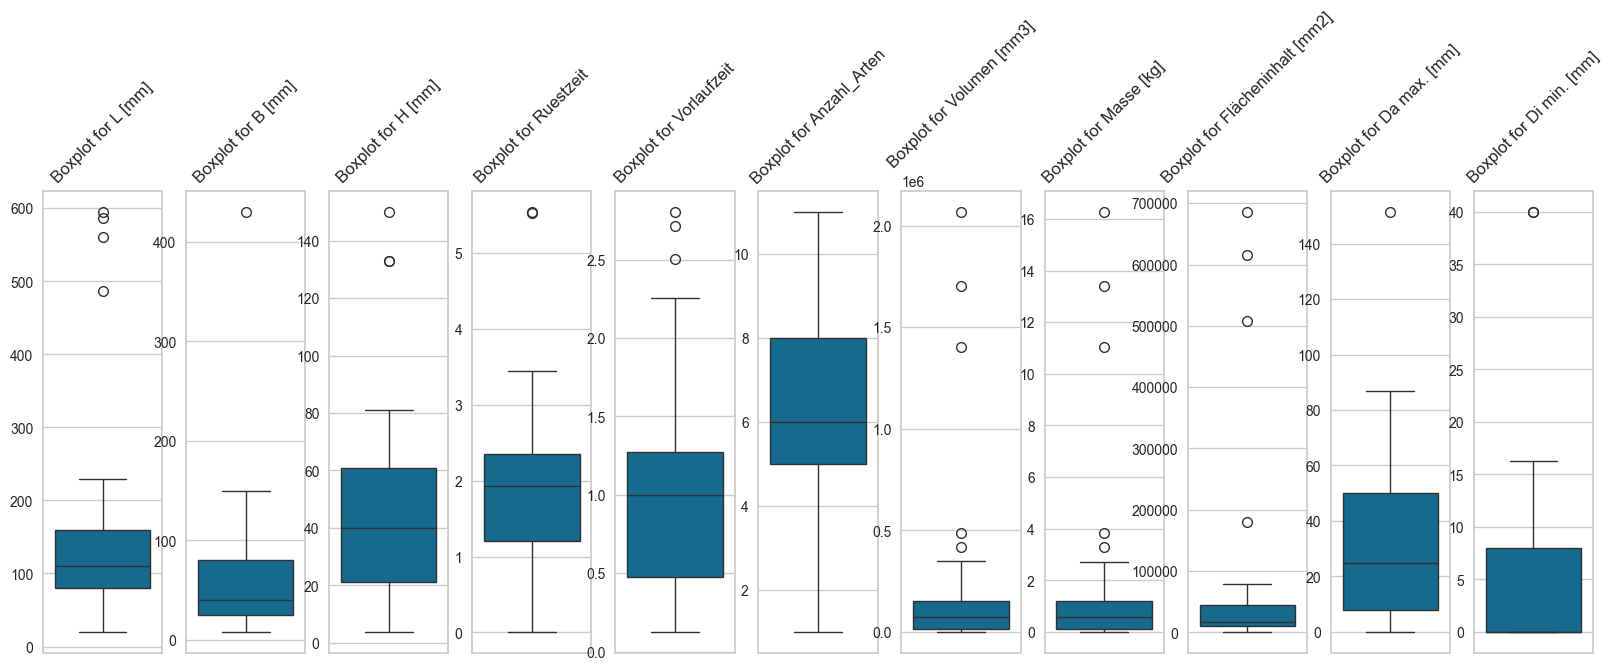

In [12]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_colums)

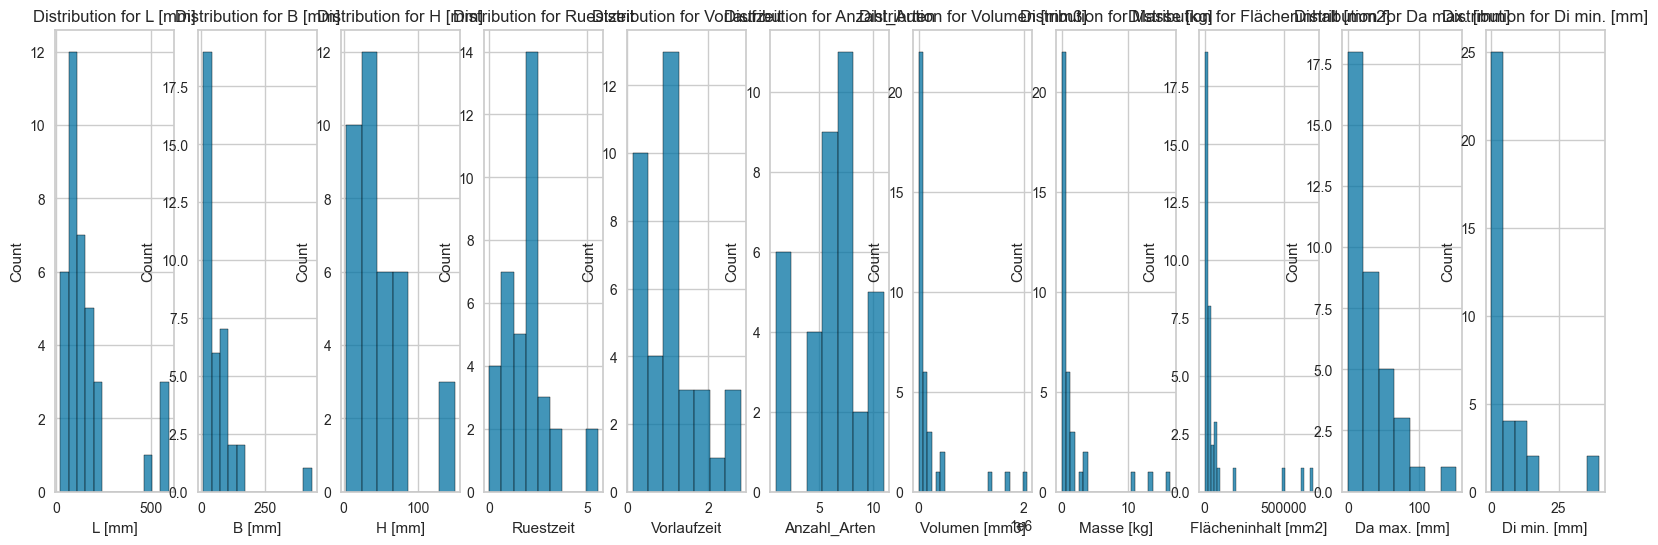

In [13]:
# show histograms of categorical columns
exploration.distribution(data, num_colums)

__Clustering__

In [14]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

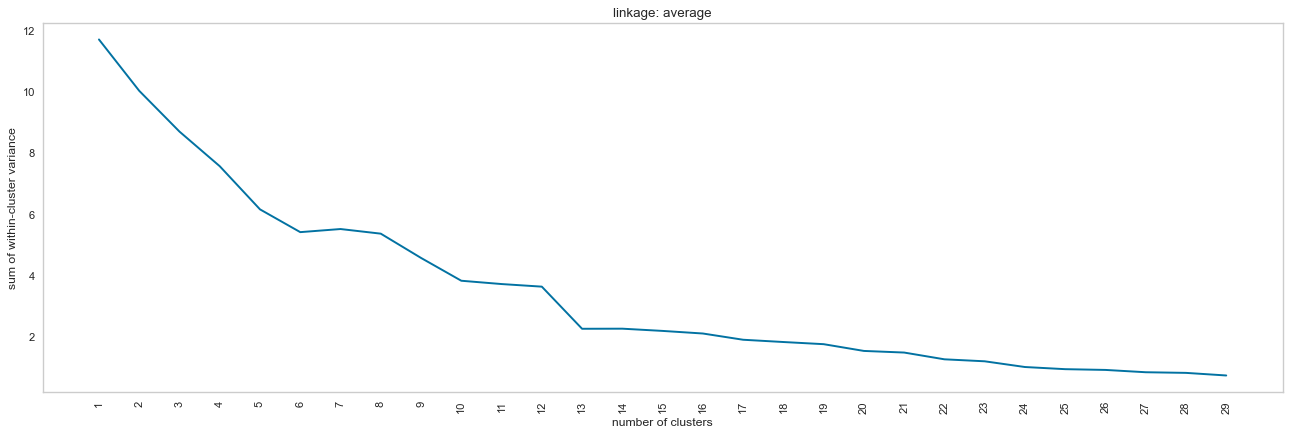

In [15]:
### plot the elbow plot for the first 20 clusters
evaluation.elbow_plot(data_preprocessed, distance_matrix, 30)

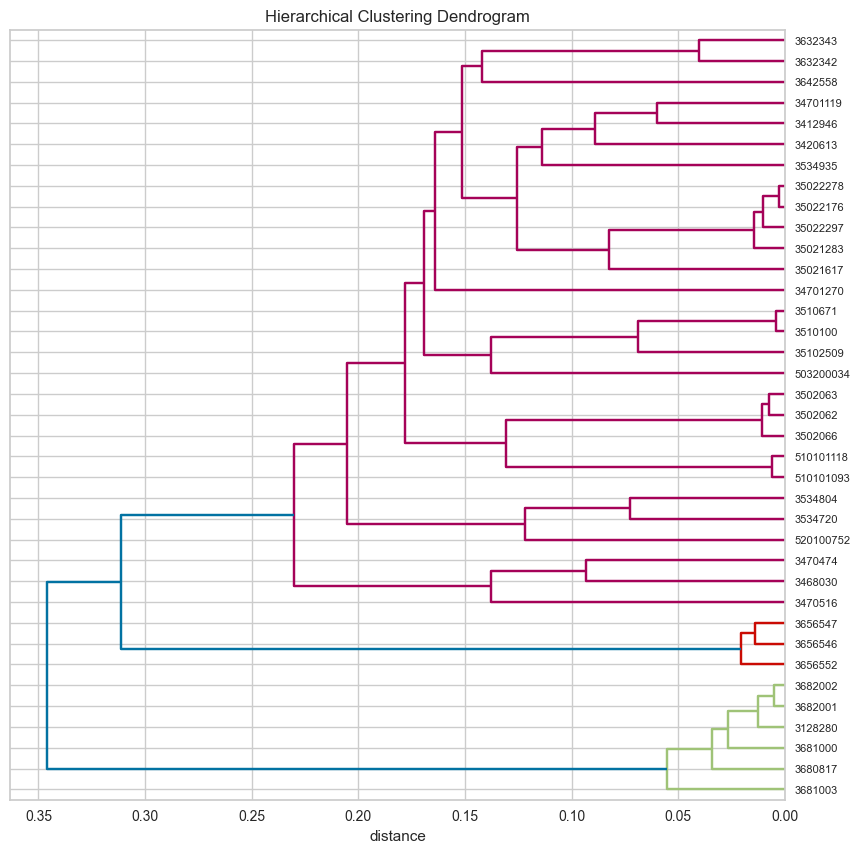

In [16]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

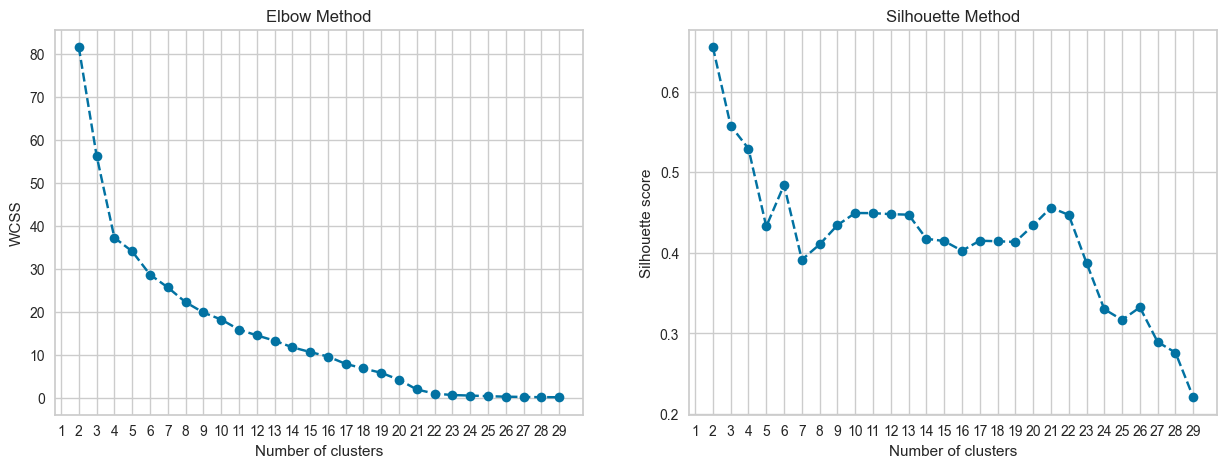

In [17]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.find_clusters_kmedoids(data_preprocessed, 30)

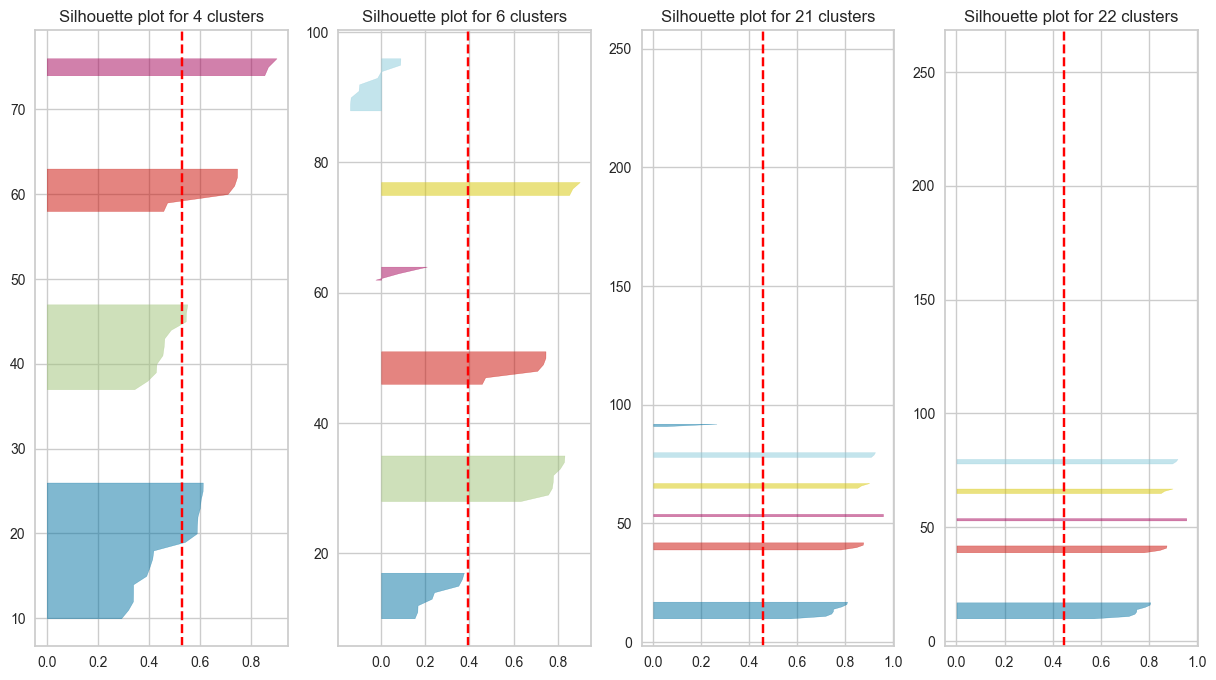

In [18]:
clustering.silhouette_plot(data_preprocessed, [4,6,21,22])

In [19]:
### apply agglomerative clustering
clusters = clustering.agglomerative_clustering(distance_matrix, 6)
### print the data per cluster
for cluster in range(6):
    print('Cluster: ', cluster)
    print(display(data[clusters == cluster]))

Cluster:  0


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3412946,5,0.534000,0.276000,1,1,0,0,1,1,0,...,RND_011,2445.25,0.019,2202.2,30.0,17.00,17.0,30.0,17.0,6.5
3420613,4,0.006500,0.175000,1,1,0,0,1,1,0,...,RND_008,757.54,0.006,770.2,20.0,20.00,3.8,3.8,20.0,9.0
34701119,4,0.255000,0.270000,1,1,0,0,1,1,0,...,OTHERASSEM,45043.36,0.354,30556.0,60.0,39.00,29.0,0.0,0.0,0.0
34701270,6,1.336667,1.603333,1,1,1,0,1,1,0,...,OTHR_004,149498.38,1.174,75149.1,88.5,79.08,78.4,0.0,0.0,0.0
35021283,7,1.888857,1.258571,1,1,0,0,1,1,0,...,RND_004,139030.61,1.091,24303.2,125.0,50.00,50.0,125.0,50.0,0.0
35021617,6,1.934500,0.325000,1,1,0,0,1,1,0,...,RND_006,79065.79,0.622,15592.7,159.0,36.00,36.0,159.0,36.0,0.0
35022176,6,1.611667,1.131667,1,1,0,0,1,1,0,...,RND_004,79786.09,0.628,16382.2,110.0,40.00,40.0,110.0,40.0,0.0
35022278,6,1.761667,1.115000,1,1,0,0,1,1,0,...,RND_004,68791.29,0.541,15348.9,97.0,40.00,40.0,97.0,40.0,0.0
35022297,6,1.865000,1.145000,1,1,0,0,1,1,0,...,RND_004,21406.34,0.168,7812.0,79.5,25.00,25.0,79.5,25.0,0.0


None
Cluster:  1


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3468030,9,3.447778,1.857778,1,1,0,1,1,1,0,...,RND_010,244025.92,1.916,44537.8,81.0,80.0,80.0,81.0,80.00,40.0
3470474,8,2.565000,2.717500,1,1,0,0,1,1,0,...,RND_010,23884.52,0.187,10807.6,68.5,36.0,32.0,68.5,36.00,10.0
3470516,11,5.542727,2.804545,1,1,0,0,1,1,1,...,RND_011,349138.09,2.723,63368.3,110.0,85.0,81.0,81.0,151.43,40.0


None
Cluster:  2


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3502062,8,1.928875,2.255000,1,1,0,0,1,1,0,...,RND_006,39768.89,0.313,11099.7,78.0,40.0,40.0,78.0,40.0,0.0
3502063,8,2.185125,1.910000,1,1,0,0,1,1,0,...,RND_006,52040.74,0.410,13063.2,103.0,40.0,40.0,103.0,40.0,0.0
3502066,8,2.235125,2.038750,1,1,0,0,1,1,0,...,RND_006,76584.43,0.603,16990.2,153.0,40.0,40.0,153.0,40.0,0.0
510101093,11,2.771818,1.350909,1,1,1,0,1,1,0,...,RND_005,73719.46,0.580,17252.8,88.5,54.0,54.0,88.5,54.0,0.0
510101118,11,2.795636,1.274545,1,1,1,0,1,1,0,...,RND_005,95622.71,0.753,22952.0,124.5,54.0,54.0,124.5,54.0,0.0


None
Cluster:  3


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3128280,1,1.0,1.0,0,0,1,0,0,0,0,...,RND_008,21122.01,0.166,20539.7,230.0,16.66,16.66,230.0,16.66,12.5
3680817,1,1.0,1.0,0,0,1,0,0,0,0,...,RNDASSEMBLY,6597.34,0.052,13282.6,170.0,8.00,8.00,170.0,8.00,6.0
3681000,1,2.0,1.0,0,0,1,0,0,0,0,...,RND_008,9401.35,0.074,5824.9,60.0,21.00,21.00,60.0,21.00,14.0
3681003,1,1.6,1.0,0,0,1,0,0,0,0,...,BNDPRF_002,13716.14,0.108,13791.5,213.0,147.00,8.00,0.0,0.00,0.0
3682001,1,1.2,1.0,0,0,1,0,0,0,0,...,RND_008,4523.89,0.036,9104.3,160.0,10.00,10.00,160.0,10.00,8.0
3682002,1,1.2,1.0,0,0,1,0,0,0,0,...,RND_008,5654.87,0.045,11366.3,200.0,10.00,10.00,200.0,10.00,8.0


None
Cluster:  4


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3534720,10,2.385400,0.475000,1,1,0,0,1,1,1,...,RNDASSEMBLY,199809.96,1.573,45268.9,125.0,100.0,30.0,30.0,87.0,12.5
3534804,9,1.824444,0.353333,1,1,0,0,1,1,0,...,OTHR_005,155035.53,1.217,35869.8,100.0,80.0,31.0,0.0,0.0,0.0
520100752,10,5.522000,0.611000,1,1,0,0,1,1,0,...,RND_005,193069.50,1.506,37081.8,158.5,70.0,70.0,158.5,70.0,0.0


None
Cluster:  5


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3656546,7,2.202857,0.798571,0,1,0,1,0,0,0,...,OTHR_006,1404514.91,11.054,508158.1,487.0,133.0,133.0,0.0,0.0,0.0
3656547,7,2.202857,0.878571,0,1,0,1,0,0,0,...,OTHR_006,1705082.50,13.419,615003.6,587.0,133.0,133.0,0.0,0.0,0.0
3656552,7,2.345714,0.818571,0,1,0,1,0,0,0,...,OTHR_006,2067654.99,16.272,685802.1,560.0,150.0,150.0,0.0,0.0,0.0


None


In [21]:
### apply kmedoids clustering
clusters = clustering.kmedoids_clustering(distance_matrix, 4)
### print the data per cluster
for cluster in range(4):
    print('Cluster: ', cluster)
    print(display(data[clusters == cluster]))

Cluster:  0


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3128280,1,1.000000,1.000000,0,0,1,0,0,0,0,...,RND_008,21122.01,0.166,20539.7,230.0,16.66,16.66,230.0,16.66,12.5
3412946,5,0.534000,0.276000,1,1,0,0,1,1,0,...,RND_011,2445.25,0.019,2202.2,30.0,17.00,17.00,30.0,17.00,6.5
3420613,4,0.006500,0.175000,1,1,0,0,1,1,0,...,RND_008,757.54,0.006,770.2,20.0,20.00,3.80,3.8,20.00,9.0
34701119,4,0.255000,0.270000,1,1,0,0,1,1,0,...,OTHERASSEM,45043.36,0.354,30556.0,60.0,39.00,29.00,0.0,0.00,0.0
34701270,6,1.336667,1.603333,1,1,1,0,1,1,0,...,OTHR_004,149498.38,1.174,75149.1,88.5,79.08,78.40,0.0,0.00,0.0
3510100,6,0.721667,1.141667,1,1,0,0,1,1,0,...,RND_004,14341.75,0.113,5315.7,133.0,12.00,12.00,133.0,12.00,0.0
35102509,6,0.913333,0.271667,1,1,0,0,1,1,0,...,RND_004,13607.51,0.107,4563.0,41.5,36.00,36.00,41.5,36.00,0.0
3510671,6,0.688167,1.141667,1,1,0,0,1,1,0,...,RND_004,7842.99,0.062,3560.4,106.5,10.00,10.00,106.5,10.00,0.0
3534720,10,2.385400,0.475000,1,1,0,0,1,1,1,...,RNDASSEMBLY,199809.96,1.573,45268.9,125.0,100.00,30.00,30.0,87.00,12.5


None
Cluster:  1


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
35021283,7,1.888857,1.258571,1,1,0,0,1,1,0,...,RND_004,139030.61,1.091,24303.2,125.0,50.0,50.0,125.0,50.0,0.0
35021617,6,1.934500,0.325000,1,1,0,0,1,1,0,...,RND_006,79065.79,0.622,15592.7,159.0,36.0,36.0,159.0,36.0,0.0
35022176,6,1.611667,1.131667,1,1,0,0,1,1,0,...,RND_004,79786.09,0.628,16382.2,110.0,40.0,40.0,110.0,40.0,0.0
35022278,6,1.761667,1.115000,1,1,0,0,1,1,0,...,RND_004,68791.29,0.541,15348.9,97.0,40.0,40.0,97.0,40.0,0.0


None
Cluster:  2


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3468030,9,3.447778,1.857778,1,1,0,1,1,1,0,...,RND_010,244025.92,1.916,44537.8,81.0,80.0,80.0,81.0,80.00,40.0
3470474,8,2.565000,2.717500,1,1,0,0,1,1,0,...,RND_010,23884.52,0.187,10807.6,68.5,36.0,32.0,68.5,36.00,10.0
3470516,11,5.542727,2.804545,1,1,0,0,1,1,1,...,RND_011,349138.09,2.723,63368.3,110.0,85.0,81.0,81.0,151.43,40.0
3502062,8,1.928875,2.255000,1,1,0,0,1,1,0,...,RND_006,39768.89,0.313,11099.7,78.0,40.0,40.0,78.0,40.00,0.0
3502063,8,2.185125,1.910000,1,1,0,0,1,1,0,...,RND_006,52040.74,0.410,13063.2,103.0,40.0,40.0,103.0,40.00,0.0
3502066,8,2.235125,2.038750,1,1,0,0,1,1,0,...,RND_006,76584.43,0.603,16990.2,153.0,40.0,40.0,153.0,40.00,0.0
510101093,11,2.771818,1.350909,1,1,1,0,1,1,0,...,RND_005,73719.46,0.580,17252.8,88.5,54.0,54.0,88.5,54.00,0.0
510101118,11,2.795636,1.274545,1,1,1,0,1,1,0,...,RND_005,95622.71,0.753,22952.0,124.5,54.0,54.0,124.5,54.00,0.0


None
Cluster:  3


,Anzahl_Arten,Ruestzeit,Vorlaufzeit,Art 35,Art 10,Art 11,Art 20,Art 21,Art 30,Belegungseinheit 63105,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
35022297,6,1.865,1.145,1,1,0,0,1,1,0,...,RND_004,21406.34,0.168,7812.0,79.5,25.0,25.0,79.5,25.0,0.0


None


__Evaluation__